# Overview
Use this notebook to convert an OCT image to virtual histology.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/zero_shot_segmentation/blob/main/point_based_segmentation.ipynb) and run.


## Set Up Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
image_directory = '/content/drive/Shareddrives/Yolab - Current Projects/_Datasets/2020-11-10 10x OCT2Hist Model (Paper V2)/Results/TestSet/'

Mounted at /content/drive/


In [2]:
#segment anything (sam)
using_colab = True
visualize_sam_outputs = True

#sam algorithm input parameters
points_per_side=32
pred_iou_thresh=0.90
stability_score_thresh=0.95
crop_n_layers=1
crop_n_points_downscale_factor=2
min_mask_region_area=3000

#sam model type and weights checkpoint
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

In [3]:
#rf - roboflow dataset related params
rf_api_key="R04BinsZcBZ6PsfKR2fP"
rf_workspace="yolab-kmmfx"
rf_project = "connect_from_colab"
rf_dataset = "png-mask-semantic"

In [4]:
import torch
import torchvision
!git clone --recurse-submodules https://github.com/WinetraubLab/zero_shot_segmentation.git
%run /content/zero_shot_segmentation/setup_roboflow_and_sam.ipynb


DEVICE = torch.device('cuda')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "/content/sam_vit_h_4b8939.pth"
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
predictor = SamPredictor(sam)

Cloning into 'zero_shot_segmentation'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 213 (delta 30), reused 16 (delta 6), pack-reused 160
Receiving objects: 100% (213/213), 20.38 MiB | 29.99 MiB/s, done.
Resolving deltas: 100% (97/97), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uni

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to connect_from_colab-1 in png-mask-semantic:: 100%|██████████| 6/6 [00:00<00:00, 3261.51it/s]


/content/connect_from_colab-1/test
/content/connect_from_colab-1/test/_annotations.coco.json
PyTorch version: 2.1.0+cu118
Torchvision version: 0.16.0+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-tbct1apd
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-tbct1apd
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=a50d8621900f77a8f0c679a9b3a4859f2bc8865a0732413901aa9f59ba95a937
  Stored in directory: /tmp/pip-ephem-wheel-cache-9tjohxro/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2023-11-05 19:05:14--  https://pbs.twimg.com/media/FvpQj7UWYAAgxfo?format=jpg
Resolving pb

In [5]:

!git clone --recurse-submodules https://github.com/WinetraubLab/OCT2Hist-ModelInference
!pip install -r ./OCT2Hist-ModelInference/pytorch-CycleGAN-and-pix2pix/requirements.txt

Cloning into 'OCT2Hist-ModelInference'...
remote: Enumerating objects: 775, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 775 (delta 153), reused 190 (delta 100), pack-reused 504
Receiving objects: 100% (775/775), 25.11 MiB | 30.83 MiB/s, done.
Resolving deltas: 100% (410/410), done.
Submodule 'pytorch-CycleGAN-and-pix2pix' (https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) registered for path 'pytorch-CycleGAN-and-pix2pix'
Cloning into '/content/OCT2Hist-ModelInference/pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.        
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513        
Receiving objects: 100% (2513/2513), 8.20 MiB | 23.84 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
Submodule path 'pytorch-CycleGAN-and-pix2pix': checked out '9f8f61e5a375c2e01c5187d093ce9c2409f409b0'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.2 MB/s eta 0:00:0

In [6]:
sys.path.append('./zero_shot_segmentation')
sys.path.append('./OCT2Hist-ModelInference')

import oct2hist
from utils.show_images import *
# Set up the network environment
oct2hist.setup_network()

Mounting drive: if it takes >30 sec, re-run.
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive mounted.


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import oct2hist
from utils.show_images import *
from utils.crop import crop


In [11]:
import random
import os
# List all files in the directory
all_images = os.listdir(image_directory)

# Filter out images without the suffix _realB
filtered_images = [img for img in all_images if "real_A" in img]
random.shuffle(filtered_images)
filtered_images = filtered_images[:10]

# Uncomment this part if you would like to try a single image rather than all.
#filtered_images = [''] # for one good example: ['LG-37-Slide06_Section02_yp0_patch01_real_A.png']

[[   0   23]
 [ 102   24]
 [ 204   35]
 [ 306   25]
 [ 409   32]
 [ 511   39]
 [ 613   53]
 [ 716   74]
 [ 818  138]
 [ 920   88]
 [1023   92]
 [   0   63]
 [ 102   64]
 [ 204   75]
 [ 306   65]
 [ 409   72]
 [ 511   79]
 [ 613   93]
 [ 716  114]
 [ 818  178]
 [ 920  128]
 [1023  132]
 [   0  193]
 [ 102  218]
 [ 204  190]
 [ 306  201]
 [ 409  208]
 [ 511  212]
 [ 613  210]
 [ 716  249]
 [ 818  306]
 [ 920  238]
 [1023  242]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


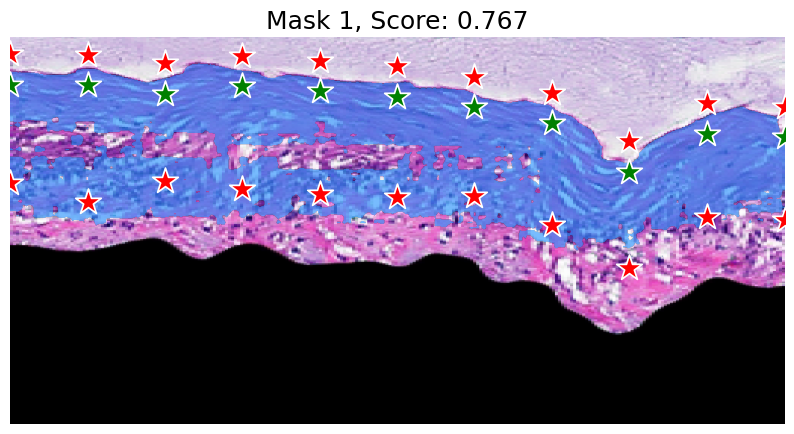

Image LG-37-Slide06_Section01_yp0_patch01_real_A.png ready.
[[   0  169]
 [ 102  175]
 [ 204  154]
 [ 306  135]
 [ 409  114]
 [ 511   91]
 [ 613   88]
 [ 716   87]
 [ 818   93]
 [ 920   92]
 [1023  100]
 [   0  209]
 [ 102  215]
 [ 204  194]
 [ 306  175]
 [ 409  154]
 [ 511  131]
 [ 613  128]
 [ 716  127]
 [ 818  133]
 [ 920  132]
 [1023  140]
 [   0  282]
 [ 102  281]
 [ 204  263]
 [ 306  239]
 [ 409  227]
 [ 511  215]
 [ 613  212]
 [ 716  213]
 [ 818  231]
 [ 920  238]
 [1023  228]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


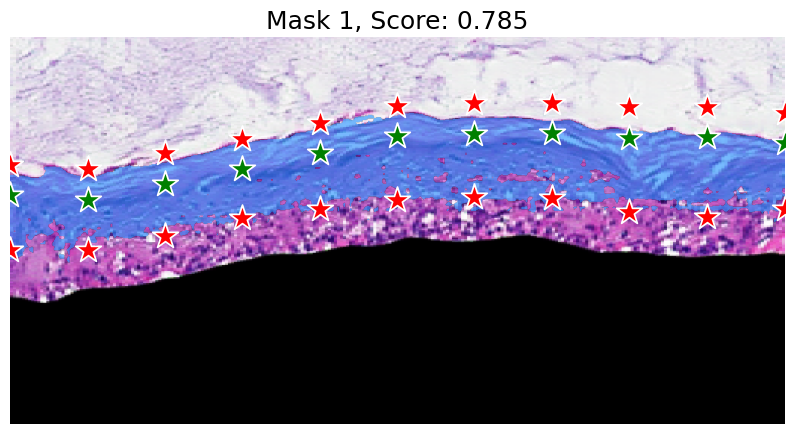

Image LD-11-Slide07_Section02_yp0_patch01_real_A.png ready.
[[   0   35]
 [ 102   71]
 [ 204   34]
 [ 306    5]
 [ 409    0]
 [ 511    0]
 [ 613    0]
 [ 716   14]
 [ 818   48]
 [ 920   65]
 [1023   57]
 [   0   75]
 [ 102  111]
 [ 204   74]
 [ 306   45]
 [ 409   40]
 [ 511   40]
 [ 613   40]
 [ 716   54]
 [ 818   88]
 [ 920  105]
 [1023   97]
 [   0  143]
 [ 102  174]
 [ 204  175]
 [ 306  145]
 [ 409  107]
 [ 511  138]
 [ 613  138]
 [ 716  162]
 [ 818  186]
 [ 920  211]
 [1023  203]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


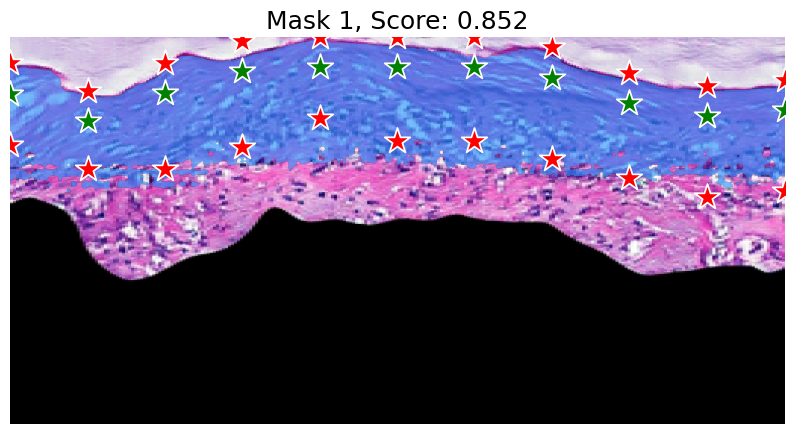

Image LGC-58-Slide03_Section03_yp0_patch01_real_A.png ready.
[[  21  159]
 [ 121   68]
 [ 221    0]
 [ 321    0]
 [ 421    0]
 [ 522   12]
 [ 622   29]
 [ 722   41]
 [ 822   54]
 [ 922   83]
 [1023  104]
 [  21  199]
 [ 121  108]
 [ 221   40]
 [ 321   40]
 [ 421   40]
 [ 522   52]
 [ 622   69]
 [ 722   81]
 [ 822   94]
 [ 922  123]
 [1023  144]
 [  21  200]
 [ 121  136]
 [ 221   89]
 [ 321   91]
 [ 421   85]
 [ 522  105]
 [ 622  121]
 [ 722  132]
 [ 822  173]
 [ 922  200]
 [1023  158]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


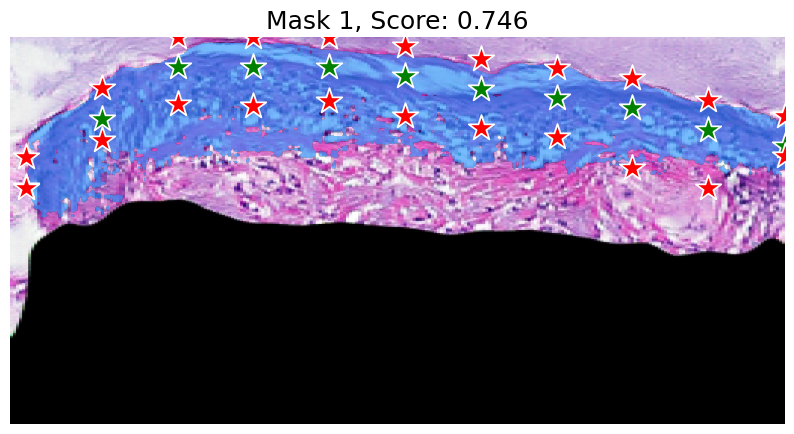

Image LG-25-Slide05_Section03_yp0_patch01_real_A.png ready.
[[   0  226]
 [ 102  105]
 [ 204   28]
 [ 306   19]
 [ 409   34]
 [ 511   49]
 [ 613   68]
 [ 716   75]
 [ 818   88]
 [ 920  113]
 [1023  148]
 [   0  266]
 [ 102  145]
 [ 204   68]
 [ 306   59]
 [ 409   74]
 [ 511   89]
 [ 613  108]
 [ 716  115]
 [ 818  128]
 [ 920  153]
 [1023  188]
 [   0  341]
 [ 102  199]
 [ 204  173]
 [ 306  176]
 [ 409  193]
 [ 511  181]
 [ 613  231]
 [ 716  241]
 [ 818  243]
 [ 920  264]
 [1023  226]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


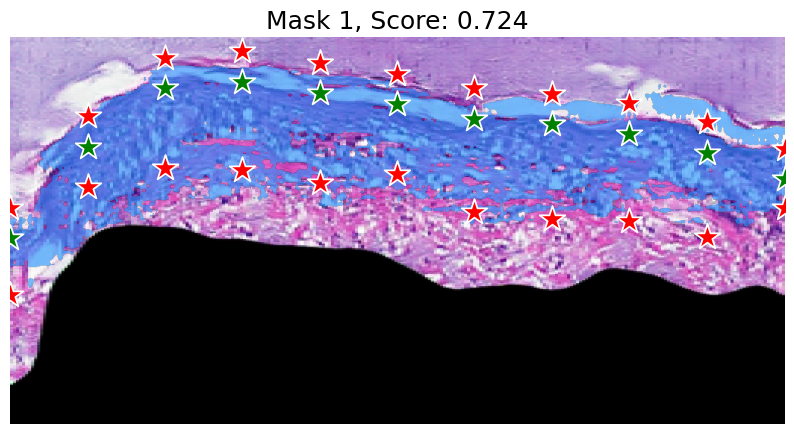

Image LG-25-Slide06_Section03_yp0_patch01_real_A.png ready.
[[   0   83]
 [ 102   71]
 [ 204   53]
 [ 306   27]
 [ 409   28]
 [ 511    0]
 [ 613   13]
 [ 716   69]
 [ 818  107]
 [ 920   71]
 [1023  162]
 [   0  123]
 [ 102  111]
 [ 204   93]
 [ 306   67]
 [ 409   68]
 [ 511   40]
 [ 613   53]
 [ 716  109]
 [ 818  147]
 [ 920  111]
 [1023  202]
 [   0  207]
 [ 102  192]
 [ 204  170]
 [ 306  170]
 [ 409  150]
 [ 511  168]
 [ 613  166]
 [ 716  215]
 [ 818  282]
 [ 920  208]
 [1023  314]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


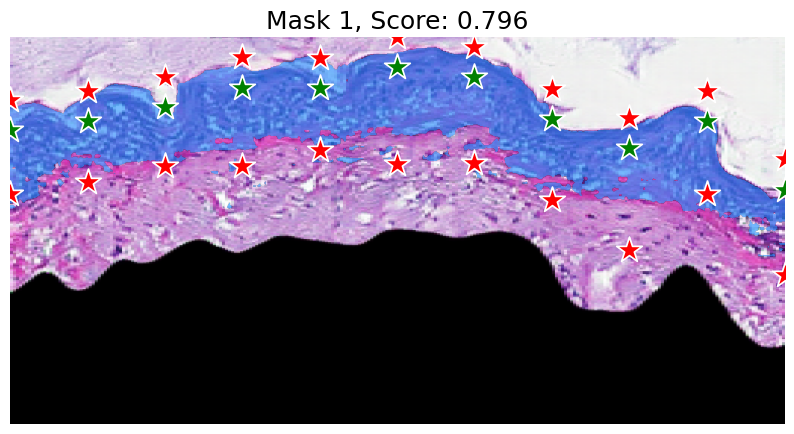

Image LG-63-Slide04_Section01_yp0_patch01_real_A.png ready.
[[   0   24]
 [ 102   39]
 [ 204   62]
 [ 306   61]
 [ 409   74]
 [ 511   91]
 [ 613   82]
 [ 716  103]
 [ 818  111]
 [ 920  111]
 [1023  109]
 [   0   64]
 [ 102   79]
 [ 204  102]
 [ 306  101]
 [ 409  114]
 [ 511  131]
 [ 613  122]
 [ 716  143]
 [ 818  151]
 [ 920  151]
 [1023  149]
 [   0  167]
 [ 102  167]
 [ 204  201]
 [ 306  206]
 [ 409  206]
 [ 511  221]
 [ 613  221]
 [ 716  290]
 [ 818  275]
 [ 920  271]
 [1023  269]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


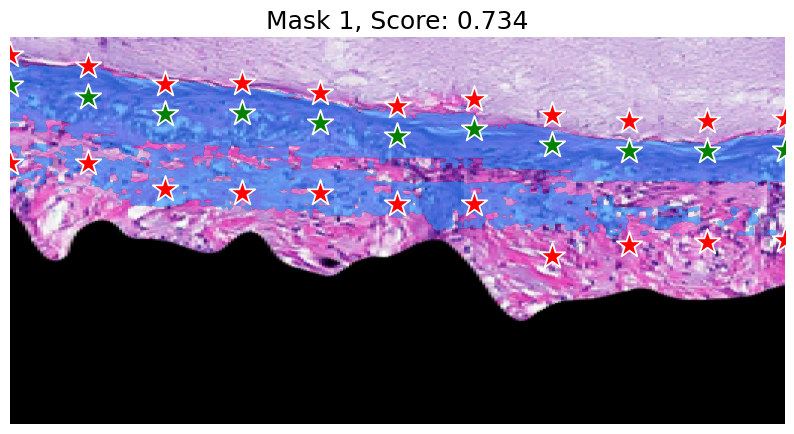

Image LGC-56-Slide03_Section03_yp0_patch01_real_A.png ready.
[[   0   12]
 [ 102   53]
 [ 204  127]
 [ 306  120]
 [ 409  116]
 [ 511  123]
 [ 613   75]
 [ 716   86]
 [ 818    0]
 [ 920   63]
 [1023   58]
 [   0   52]
 [ 102   93]
 [ 204  167]
 [ 306  160]
 [ 409  156]
 [ 511  163]
 [ 613  115]
 [ 716  126]
 [ 818   40]
 [ 920  103]
 [1023   98]
 [   0  136]
 [ 102  163]
 [ 204  243]
 [ 306  286]
 [ 409  235]
 [ 511  219]
 [ 613  158]
 [ 716  218]
 [ 818  225]
 [ 920  201]
 [1023  180]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


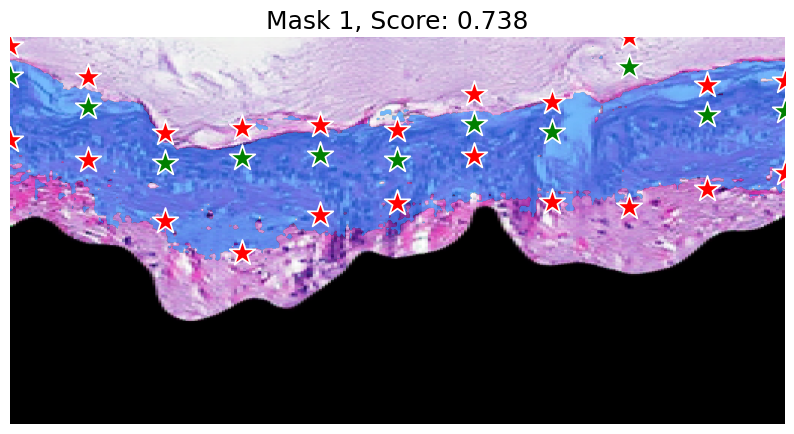

Image LG-67-Slide05_Section01_yp0_patch01_real_A.png ready.


In [12]:
# -*- coding: utf-8 -*-
"""run_oct2hist.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/github/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_oct2hist.ipynb

# Overview
Use this notebook to convert an OCT image to virtual histology.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_oct2hist.ipynb) and run.
"""

import random
import sys
from utils.show_images import showImg

import torch
from segment_anything import sam_model_registry, SamPredictor

import oct2hist
from utils.masking import get_sam_input_points, show_points, show_mask, mask_gel_and_low_signal

# from google.colab import drive

import cv2
import matplotlib.pyplot as plt

import os

for filename in filtered_images:
    oct_input_image_path = os.path.join(image_directory, filename)
    # Load OCT image
    oct_image = cv2.imread(oct_input_image_path)
    oct_image = cv2.cvtColor(oct_image, cv2.COLOR_BGR2RGB)
    #is it sheered?
    right_column = oct_image.shape[1]-1
    if (oct_image[:,0,0] == 0).all() or (oct_image[:,right_column,0] == 0).all():
        continue
    # OCT image's pixel size
    microns_per_pixel_z = 1
    microns_per_pixel_x = 1

    # no need to crop - the current folder contains pre cropped images.
    # cropped = crop_oct(oct_image)

    #workaround: for some reason the images look close to the target shape, but not exactly.
    oct_image = cv2.resize(oct_image, [1024, 512], interpolation=cv2.INTER_AREA)

    #for good input points, we need the gel masked out.
    masked_gel_image = mask_gel_and_low_signal(oct_image)

    # run vh&e
    virtual_histology_image, _, o2h_input = oct2hist.run_network(oct_image,
                                                                                             microns_per_pixel_x=microns_per_pixel_x,
                                                                                             microns_per_pixel_z=microns_per_pixel_z)
    # mask
    input_point, input_label = get_sam_input_points(masked_gel_image, virtual_histology_image)

    predictor.set_image(virtual_histology_image)
    masks, scores, logits = predictor.predict(point_coords=input_point, point_labels=input_label,
                                              multimask_output=False, )

    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(5, 5))
        plt.imshow(virtual_histology_image)
        show_mask(mask, plt.gca())
        show_points(input_point, input_label, plt.gca())
        plt.title(f"Mask {i + 1}, Score: {score:.3f}", fontsize=18)
        plt.axis('off')
        plt.show()
    print(f"Image {filename} ready.")
